<div style="border:solid green 2px; padding: 20px">

<b>Привет, Кристина! Поздравляю с выполнением очередного проекта!!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Комментарий студента:** Привет, Пётр! Постараюсь исправить все замечания и использовать твои советы, спасибо за проверку! :)

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Здравствуй, Кристина, пожалуйста! Отправляюсь ещё раз проверять) 

</div>

# Исследование для развлекательного приложения Procrastinate Pro+

In [26]:
k = 3
a = 1
if ((k<0) or (k%1!=0)):
    print(-1)
else:
    for i in range(k):
          a*=(k-i)
    print(a)

6


## Введение

В данном исследовании будет рассматриваться развлекательное приложение *Procrastinate Pro+*.

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.

В качестве исходных данных представлены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, а именно:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Необходимо изучить:**

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Исследование будет проводиться в несколько этапов:**

1. Загрузка данных и их подготовка к анализу
2. Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии
3. Исследовательский анализ данных
4. Изучение показателей маркетинга
5. Оценка окупаемости рекламы
6. Общий вывод и рекомендации

### Загрузка данных и их подготовка к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

#### Загрузка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from IPython.display import display

In [2]:
# чтение файлов и их запись в датафреймы

visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs_info = pd.read_csv('/datasets/costs_info_short.csv')

#### Изучение общей информации о данных

In [3]:
# функция для изучения датафреймов

def research(data):
    display(data.head(10))                            # вывод первых строк датафрейма
    display(data.info())                              # вывод общей информации о датафрейме
    print('\033[1m Количество полных дублей: \033[0m', 
            data.duplicated().sum())                  # проверка на полные дубликаты
    display(data.describe())                          # описание распределения численных значений
    
    for x in data.columns:
        display(data[x].value_counts().to_frame())    # распределение значений в каждом столбце

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Отличная функция для первичного анализа, но несколько комментариев-рекомендаций:
* для вывода `info` дополнительно необязательно писать `display`
* лучше как-нибудь аналитику при помощи разных методов, по разным функциям отделить друг от друга, например рекомендую такой разделитель `print('*'*50)`
</div>

Выведем первые 10 строк с каждого загруженного датафрейма и общую информацию о каждом из них. Начнём с датафрейма посещений сайта:

In [4]:
research(visits)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

 Количество полных дублей:  0


,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


,User Id
33606575057,46
943775408561,36
901180916748,35
870784569391,34
764086596354,33
...,...
350468480225,1
748123264144,1
909267360937,1
816252757222,1


,Region
United States,207327
UK,36419
France,35396
Germany,30759


,Device
iPhone,112603
Android,72590
PC,62686
Mac,62022


,Channel
organic,107760
TipTop,54794
FaceBoom,49022
WahooNetBanner,20465
LeapBob,17013
OppleCreativeMedia,16794
RocketSuperAds,12724
YRabbit,9053
MediaTornado,8878
AdNonSense,6891


,Session Start
2019-10-26 12:40:03,3
2019-09-02 05:57:01,3
2019-09-25 03:10:33,3
2019-10-01 09:35:59,3
2019-06-27 14:56:41,3
...,...
2019-07-16 13:22:25,1
2019-07-26 16:50:29,1
2019-08-08 00:31:56,1
2019-06-22 20:14:25,1


,Session End
2019-08-03 10:18:44,3
2019-05-28 14:36:05,3
2019-06-06 02:15:34,3
2019-05-20 08:57:51,3
2019-08-20 15:27:15,3
...,...
2019-05-19 02:06:27,1
2019-05-26 20:07:35,1
2019-08-03 22:14:08,1
2019-09-03 07:45:12,1


Датафрейм `visits` не содержит пропусков и дубликатов в данных.
Необходимо привести все названия колонок датафрейма к нижнему регистру и добавить подчеркивания между словами, а также привести данные о дате и времени начала и окончания сессии в верный тип данных - `datetime`. Столбцы `Region`, `Device` и `Channel` имеют небольшое количество уникальных значений, поэтому их тип данных можно изменить на категориальный для экономии памяти. Такая предобработка данных будет выполнена в следующем пункте исследования.

Далее изучим датафрейм с заказами:

In [5]:
research(orders)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

 Количество полных дублей:  0


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


,User Id
901180916748,22
883098437811,20
75337957494,19
512471511263,19
295795879965,19
...,...
237296010927,1
319939546352,1
742075710598,1
202972423389,1


,Event Dt
2019-07-09 07:44:10,2
2019-09-23 08:49:08,2
2019-10-02 00:31:33,2
2019-07-21 10:05:46,2
2019-10-23 14:13:49,2
...,...
2019-09-16 05:49:06,1
2019-10-09 07:16:46,1
2019-06-23 12:20:46,1
2019-06-14 13:54:17,1


,Revenue
4.99,38631
5.99,780
9.99,385
49.99,212
19.99,204


Датафрейм `orders` так же не содержит пропусков и дубликатов. Здесь тоже необходимо привести все названия колонок датафрейма к нижнему регистру и добавить подчеркивания между словами, а также изменить тип данных в столбце, содержащем дату и время покупки на `datetime`.

И последний датафрейм `costs_info` с информацией о расходах на рекламу:

In [6]:
research(costs_info)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

 Количество полных дублей:  0


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


,dt
2019-08-06,10
2019-10-27,10
2019-05-02,10
2019-06-12,10
2019-07-03,10
...,...
2019-08-13,10
2019-08-24,10
2019-07-11,10
2019-09-29,10


,Channel
MediaTornado,180
TipTop,180
WahooNetBanner,180
OppleCreativeMedia,180
AdNonSense,180
YRabbit,180
RocketSuperAds,180
lambdaMediaAds,180
FaceBoom,180
LeapBob,180


,costs
6.40,26
3.36,21
9.60,20
16.80,19
4.32,17
...,...
217.80,1
186.20,1
176.70,1
273.00,1


Пропусков и дубликатов нет. Следует изменить регистр в названии столбца `Channel`, а также тип данных в столбце `dt` на `date` и столбец `Channel` на категориальный тип данных.

#### Предобработка данных

##### Приведение столбцов к корректному стилю оформления

In [7]:
# функция для приведения названий столбцов к нижнему регистру и замены пробелов на подчеркивания и проверка

def change_column(data):
    data.columns = [x.lower().replace(' ', '_') for x in data.columns]
    return display(data.columns)

In [8]:
# вызов функции для каждого датафрейма

change_column(visits)
change_column(orders)
change_column(costs_info)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 
    
* Проблема названий столбцов ведь только в том, что имеются пробелы и заглавные буквы, соответственно можно было бы обойтись и без `rename`
* Могу предложить такой вариант `visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]`
    

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Комментарий студента:** Поправила в соответствии с твоей рекомендацией.

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Зачастую проблемы в названии столбцов связаны как раз с пробелами и заглавным буквами, поэтому рекомендую помнить о таком способе замен
</div>

Преобразование выполнено успешно.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Ты для каждого датафрейма пишешь очень схожие куски кода, но можно ведь сделать функцию для первичного анализа датафреймов. Смотреть распределение численных значений при помощи `describe`, анализировать какие строки наиболее частые при помощи `value_counts`, ну и `head` с `info` в эту же функцию первичного анализа стоит поместить. Переносить функцию из проекта в проект, чтобы максимально упрощать себе первичный анализ и оставлять больше сил и времени на исследования. Получая зелёные комментарии от ревьюеров.)
    
</div>

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Комментарий студента:** Создала функцию в начале *п.1.1.2*

##### Преобразование типов данных

In [9]:
# преобразуем тип данных в datetime и date:

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs_info['dt'] = pd.to_datetime(costs_info['dt']).dt.date

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
У `read_csv` есть параметр, который позволяет даты сразу в нужный формат переводить, рекомендую к использованию  </div>

Также для сокращения использования памяти заменим тип данных в столбцах `region` и `device` и `channel` на категориальный:

In [10]:
visits = visits.astype({'region': 'category', 'device': 'category', 'channel': 'category'})
costs_info['channel'] = costs_info['channel'].astype('category')

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

В `astype` можно передавать словари, в котором ключи - названия столбцов, значения - типы данных
</div>

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Комментарий студента:** Поправила.

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Спасибо за внимание и к не критическим комментариям</div>

Проверка:

In [11]:
visits.dtypes

user_id                   int64
region                 category
device                 category
channel                category
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

In [12]:
orders.dtypes

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

In [13]:
costs_info.dtypes

dt           object
channel    category
costs       float64
dtype: object

**Вывод**

Данные, которые предстоит исследовать, записаны в 3 датафрейма: `visits` - данные о посещениях сайта, `orders` - данные о заказах и `costs_info` - информация о расходах на рекламу.

Были изменены типы данных в столбцах, содержащих (дату) дату и время на (`date`) `datetime`. В столбцах с небольшим количеством уникальных значений изменен тип данных на `category` для экономии памяти.

В названиях столбцов для оформления по правилам хорошего стиля исправлен регистр на нижний.

Пропусков и дубликатов в данных не выявлено.

### Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функции для вычисления значений метрик

##### Функция для создания профилей пользователей

In [14]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

##### Функция для расчёта удержания

In [15]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

##### Функция для расчёта конверсии

In [16]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### Функция для расчёта LTV и ROI

In [17]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функции для построения графиков

##### Функция для сглаживания данных

In [18]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

##### Функция для визуализации удержания

In [19]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

##### Функция для визуализации конверсии

In [20]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

##### Функция для визуализации LTV и ROI

In [21]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
        
Все необходимые функции были заданы, можно приступать к анализу. Можно было добавить больше `markdown` заголовков, чтобы разграничить функции и упростить поиск нужной

</div>

<div style="background-color:lavender; color:#black; text-align:center; padding:2%">
    
**Комментарий студента:** Добавила.

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Чем больше проект, тем важнее подробное оглавление. А если ещё предположить, что проект будет смотреть заказчик, то наличие подробного оглавления упростит его взаимодействие с проектом, возможно он посмотрит на интересующие его блоки, полагаю, что оглавление в данном случае возвысит тебя в его глазах)
</div>

**Вывод**

В данном пункте исследования обозначены функции для расчёта и визуализации LTV, ROI, удержания и конверсии, которые необходимы для дальнейшего исследовательского анализа данных развлекательного приложения Procrastinate Pro+.

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей. Минимальная и максимальная дата привлечения пользователей.

In [22]:
# составим профили пользователей и выведем первые 5 строк датафрейма для проверки:

profiles = get_profiles(visits, orders, costs_info)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определим минимальную и максимальную даты привлечения пользователей:

In [23]:
display(profiles['dt'].min())
profiles['dt'].max()

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Отлично, что проверили корректность временного интервала. Соответствует ли этот период указанному в задании? Хотелось бы в проекте видеть акцент на этом моменте. 
* В принципе нет необходимости в дополнительных переменных, ведь ты их используешь однократно и можно прям в `print` рассчитать эти значения 


<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
**Комментарий студента:** 
- Ниже ведь в выводе пишу о том, что период совпадает с тем, что обозначен в описании проекта.
- Поправила.
    

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Прошу прощения. Спасибо, и в жизни и даже в проектах Практикума не всегда описание временного интервала будет совпадать с реальными данными, поэтому лучше интервал всегда проверять)
</div>

**Вывод**

Таким образом, с помощью функции `get_profiles` были составлены профили пользователей.
Определены минимальная и максимальная дата привлечения пользователей: *1 мая 2019* и *27 октября 2019* соответственно. Даты совпадают с теми, что были обозначены для исследования в описании проекта.

#### Страны пользователей. Количество пользователей и доля платящих из каждой страны

Определим какие страны представлены в профилях пользователя:

In [24]:
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

Выясним на какую страну приходится больше всего платящих пользователей:

In [25]:
(
    profiles.query('payer==True')
    .groupby('region')
    .agg({'user_id':'nunique'})
    .sort_values(by='user_id', ascending=False)
)

,user_id
region,
United States,6902
UK,700
France,663
Germany,616


Далее найдём количество пользователей и долю платящих пользователей из каждой страны:

In [26]:
(
    profiles
    .groupby('region')
    .agg({'user_id':'nunique','payer':'mean'})
    .sort_values(by='payer', ascending=False)
    .style
    .format({'payer': '{:.1%}'})
)

,user_id,payer
region,,
United States,100002,6.9%
Germany,14981,4.1%
UK,17575,4.0%
France,17450,3.8%


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
    
Eсть любопытный способ, который позволяет облагородить вывод в частности и дробей - `style.format`, начать читать про него можно [тут](https://habr.com/ru/post/521894/)


</div>

<div style="background-color:lavender; color:#black; text-align:centr; padding:2%">
    
**Комментарий студента:**  Использовала.
    

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
По ссылке ещё рассказывают, как и цветом выделять ячейки датафрейма, очень информативно

</div>

**Вывод**

- в данных представлены пользователи четырёх стран: *США, Германия, Великобритания и Франция*;
- большее количество пользователей приходится на *США*, меньшее - на *Германию*;
- большее количество платящих пользователей аналогично приходится на *США*, меньшее - на *Германию*;
- при этом наибольшая доля платящих пользователей наблюдается также в *США*, однако наименьшая - во *Франции*.

#### Устройства пользователей. Количество пользователей и доля платящих для каждого устройства

Определим все виды устройств, которые представлены в профилях пользователя:

In [27]:
profiles['device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

Узнаем какие устройства предпочитают платящие пользователи:

In [28]:
(
    profiles.query('payer==True')
    .groupby('device')
    .agg({'user_id':'nunique'})
    .sort_values(by='user_id', ascending=False)
)

,user_id
device,
iPhone,3382
Android,2050
Mac,1912
PC,1537


Далее найдём количество уникальных пользователей и долю платящих для каждого устройства:

In [29]:
(
    profiles
    .groupby('device')
    .agg({'user_id':'nunique','payer':'mean'})
    .sort_values(by='payer', ascending=False)
    .style
    .format({'payer': '{:.1%}'})
)

,user_id,payer
device,,
Mac,30042,6.4%
iPhone,54479,6.2%
Android,35032,5.9%
PC,30455,5.0%


**Вывод**

- клиенты пользуются всего 4-мя видами устройств: *Mac, iPhone, PC и Android*;
- большее количество клиентов пользуется устройством *iPhone*, меньшее - *Mac*;
- при этом платящие пользователи также предпочитают *iPhone*, но менее всего используют *PC* ;
- однако большая доля платящих пользователей использует именно *Mac*, меньшая доля приходится на *PC*.

#### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Найдём каналы, из которых пришло больше всего платящих пользователей:

In [30]:
(
    profiles.query('payer==True')
    .groupby('channel')
    .agg({'user_id':'nunique'})
    .sort_values(by='user_id', ascending=False)
)

,user_id
channel,
FaceBoom,3557
TipTop,1878
organic,1160
WahooNetBanner,453
AdNonSense,440
RocketSuperAds,352
LeapBob,262
OppleCreativeMedia,233
lambdaMediaAds,225


Затем отразим количество уникальных пользователей и долю платящих для каждого канала привлечения:

In [31]:
(
    profiles
    .groupby('channel')
    .agg({'user_id':'nunique','payer':'mean'})
    .sort_values(by='payer', ascending=False)
    .style
    .format({'payer': '{:.1%}'})
)

,user_id,payer
channel,,
FaceBoom,29144,12.2%
AdNonSense,3880,11.3%
lambdaMediaAds,2149,10.5%
TipTop,19561,9.6%
RocketSuperAds,4448,7.9%
WahooNetBanner,8553,5.3%
YRabbit,4312,3.8%
MediaTornado,4364,3.6%
LeapBob,8553,3.1%


**Вывод**

- всего в приложении используется 11 каналов для привлечения пользователей;
- наибольшее количество платящих клиентов пришло из канала *FaceBoom* - 3557 человек, наименьшее из канала *MediaTornado* - всего 156 человек;
- наибольшее количество среди всех пользователей пришло из канала *organic*, а наименьшее - из канала *lambdaMediaAds*;
- при этом наибольшая доля платящих пользователей пришли именно из канала *FaceBoom*, а наименьшая - из канала *organic*.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
От органики так мало платящих, так как зачастую закупочные каналы оптимизируются с целью приведения максимально платящей аудитории, а органические пользователи случаются разные</div>

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Сумма расходов на маркетинг

Сумму расходов на маркетинг можно посчитать по датафрейму `costs_info`, либо по данным в `profiles`. Выберем первый вариант:

In [32]:
costs_info['costs'].sum()

105497.30000000002

Таким образом, сумма расходов на маркетинг составила около 105 тысяч.

#### Распределение затрат по рекламным источникам

In [33]:
# построим таблицу с затратами по каждому каналу привлечения
(
    costs_info
    .groupby('channel')
    .agg({'costs':'sum'})
    .sort_values(by='costs', ascending=False)
    .reset_index()
)

,channel,costs
0,TipTop,54751.30
1,FaceBoom,32445.60
2,WahooNetBanner,5151.00
3,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
6,LeapBob,1797.60
7,lambdaMediaAds,1557.60
8,MediaTornado,954.48
9,YRabbit,944.22


Визуализируем таблицу для лучшего восприятия:

Text(0, 0.5, 'Канал')

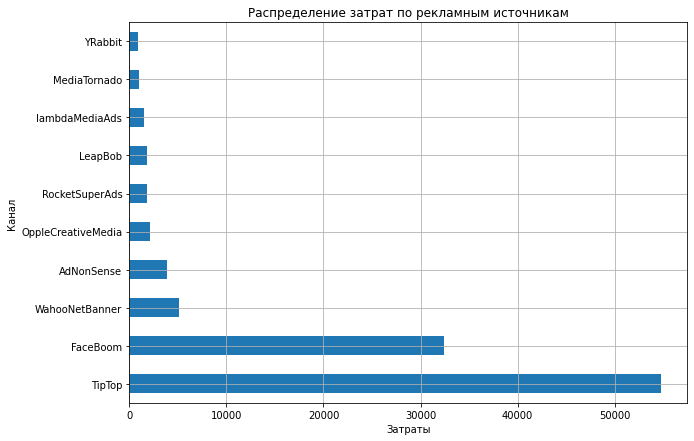

In [34]:
(
    costs_info
    .groupby('channel')['costs']
    .sum()
    .sort_values(ascending=False)
    .plot(x = 'costs', y = 'channel', kind='barh', figsize=(10,7),
    title='Распределение затрат по рекламным источникам', grid=True)
)
    
plt.xlabel('Затраты')
plt.ylabel('Канал')

**Вывод**

Более половины всех расходов на маркетинг пришлось на рекламный источник *TipTop* - "лидер" по затратам, на втором месте *FaceBoom*, на который приходится примерно треть от всех расходов.

На остальные рекламные источники затрачено значительно меньше, самое небольшое вложение наблюдается в *YRabbit*.

#### Визуализация динамики изменения расходов во времени по неделям и месяцам по каждому источнику

Для построения графика по неделям и месяцам необходимо добавить в датафрейм соответствующие столбцы:

In [35]:
costs_info['month'] = costs_info['dt'].astype('datetime64[M]') # добавляем столбец с месяцем
costs_info['week'] = pd.to_datetime(costs_info['dt']).dt.isocalendar().week # добавляем столбец с неделей

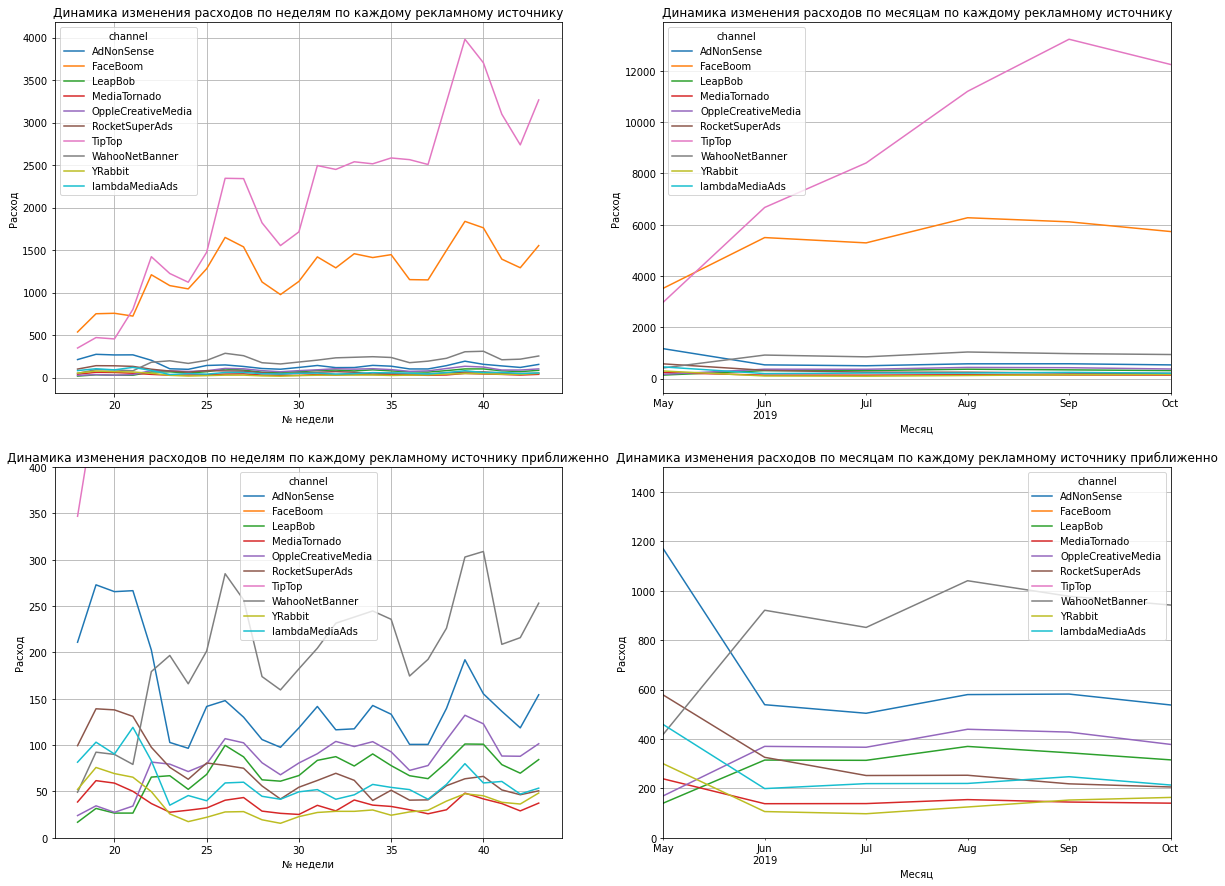

In [36]:
# динамика изменения расходов во времени по неделям и месяцам по каждому источнику

plt.figure(figsize=[20, 15])
(
    costs_info.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
    .plot(ax=plt.subplot(2, 2, 1),
          title='Динамика изменения расходов по неделям по каждому рекламному источнику', grid=True)
)
plt.xlabel('№ недели')
plt.ylabel('Расход')

(
    costs_info.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
    .plot(ax=plt.subplot(2, 2, 2),
          title='Динамика изменения расходов по месяцам по каждому рекламному источнику', grid=True)
)

plt.xlabel('Месяц')
plt.ylabel('Расход')

(
    costs_info.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
    .plot(ax=plt.subplot(2, 2, 3),
          title='Динамика изменения расходов по неделям по каждому рекламному источнику приближенно', grid=True)
)
plt.ylim(0,400)
plt.xlabel('№ недели')
plt.ylabel('Расход')

(
    costs_info.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
    .plot(ax=plt.subplot(2, 2, 4),
          title='Динамика изменения расходов по месяцам по каждому рекламному источнику приближенно', grid=True)
)
plt.ylim(0,1500)
plt.xlabel('Месяц')
plt.ylabel('Расход')


plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Для того, чтобы внимательнее изучить колебания затрат по каналам можно строить несколько графиков по размеру значений, здесь это не так критично, но вообще не особо понятно, как там дела с бюджетом всех каналов кроме двух крупнейших
</div>

<div style="background-color:lavender; color:#black; text-align:centr; padding:2%">
    
**Комментарий студента:**  Добавила ещё 2 приближенных графика.
    

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Замечательно, что для того, чтобы внимательнее изучить колебания затрат по каналам ты строишь несколько графиков по размеру значений. Через спринт расскажут про библиотеку `plotly`, она позволяет строить интерактивные графики, как раз в данном случае она была бы очень уместна, позволила бы убирать некоторые каналы, чтобы внимательнее анализировать с меньшим бюджетом, вот [ссылка](https://habr.com/ru/post/502958) если интересено</div>

**Вывод**

По графикам видно, что маркетинговые расходы на каналы: *TipTop* и *FaceBoom* значительно превалируют над остальными каналами, как было выявлено ранее.

На недельной визуализации заметно, что расходы на *TipTop* и *FaceBoom* ступенчатые, выделяются вершины графиков на 23, 26 и 39 неделях.

На месячной визуализации кривые всех каналов, кроме *TipTop* и *FaceBoom*, более линейные и кажется, что они имеют близкое к постоянному значение. Видно, что несмотря на большое вложение в канал *FaceBoom* в сентябре (39 неделя), бОльшие месячные вложения в канал были в августе. Расходы на канал *TipTop* в среднем возрастали с мая и достигли пика в сентябре, но далее  начали снижаться.

#### Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Сгруппируем профили пользователей по каналам привлечения и посчитаем среднее значение стоимости привлечения:

In [37]:
(
    profiles.groupby('channel')['acquisition_cost'].mean()
    .sort_values(ascending=False)
)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

Визуализируем данную информацию:

Text(0, 0.5, 'Канал привлечения')

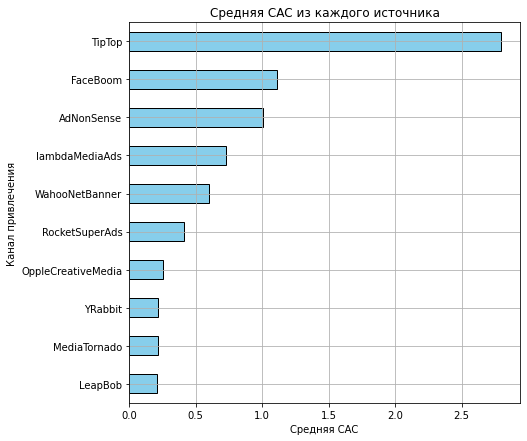

In [38]:
(
    profiles.groupby('channel')['acquisition_cost'].mean().
    drop('organic') # удаляем органический трафик, привлечение которых ничего не стоит
    .sort_values()
    .plot(kind='barh', figsize=(7,7), grid=True, edgecolor='black', color='skyblue',
          title='Cредняя CAC из каждого источника')
)

plt.xlabel('Средняя CAC')
plt.ylabel('Канал привлечения')

**Вывод**

Средняя стоимость привлечения одного клиента (CAC) достигает наивысшего значения в канале *TipTop* ~ 2,8.
Следующий канал за ним - *FaceBoom* имеет в 2,5 раза меньшую (CAC).

Наименьшая средняя стоимость привлечения пользователя наблюдается в канале *LeapBob*.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Анализ окупаемости рекламы c помощью графиков LTV, CAC и ROI (общий)

Для построения графиков необходимо задать момент анализа - 1 ноября 2019 года и горизонт - 14 дней, а также исключанием органический трафик из профилей:

In [39]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 7  # горизонт анализа
profiles_filtered = profiles.query('channel!="organic"') #

In [40]:
observation_date - timedelta(days=horizon_days - 1)

datetime.date(2019, 10, 26)

Считаем показатели и строим графики:

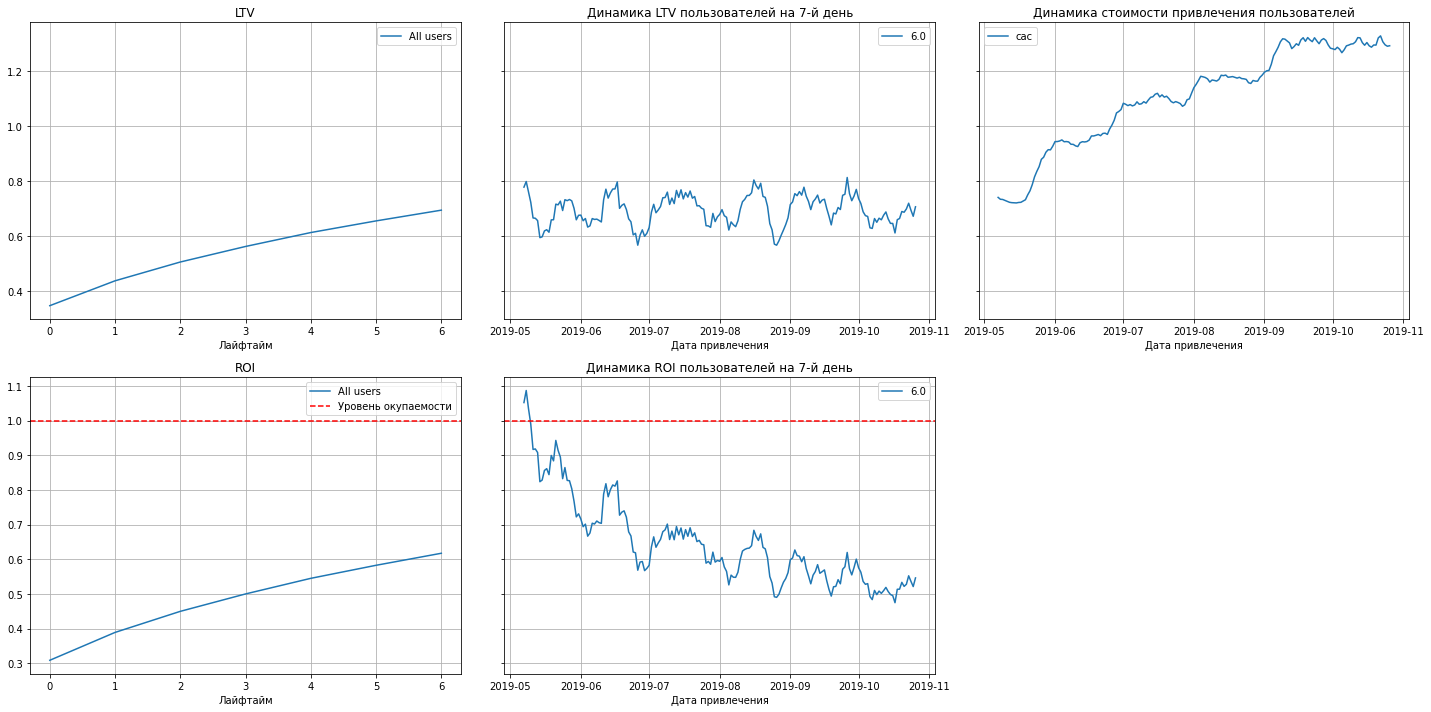

In [41]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️
    
Здесь и ниже при анализе стоит исключать органический трафик, мы не платим за этих пользователей, а доход от них может завышать довольно плачевную картину и скрыть от нас проблемы в какой-то стране или же типе устройств. Соответственно и выводы после этих правок могут поменяться, поэтому жду исключения из дальнейшего анализа всех органических пользователей и после этого прокомментирую оставшуюся часть проекта. </div>

<div style="background-color:lavender; color:#black; text-align:centr; padding:2%">
    
**Комментарий студента:** Исключила органический трафик

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Стабильность `LTV` и рост `CAC`, может говорить о росте конкуренции на канале или увеличением бюджета по каналу.</div>

По графикам без дополнительной разбивки можно сделать **выводы**:

- Реклама не окупается, в конце 2-й недели ROI достигает чуть выше 80%;
- CAC значительно возрастает, что говорит об увеличении рекламного бюджета;
- LTV достаточно стабилен.

#### Конверсия и удержание пользователей

Расчет конверсии всех пользователей и построение графиков:

In [42]:
profiles_filtered

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.900000
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.117838
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000


In [43]:
orders

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


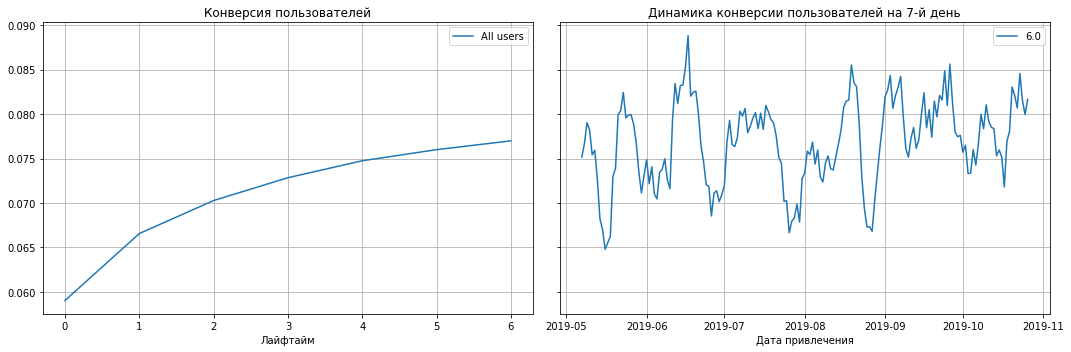

In [44]:
# смотрим конверсию без разбивки

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Общая конверсия показывает, что в целом пользователи приложения Procrastinate Pro+ на 14-й день конвертируются с показателем ~ 8%. Конверсия 14-го дня в среднем незначительно меняется во времени, для пользователей, привлечённых в середине мае, конверсия была самой низкой за весь рассматриваемый период.

Далее рассчитаем удержание для платящих и неплатящих пользователей, построим графики:

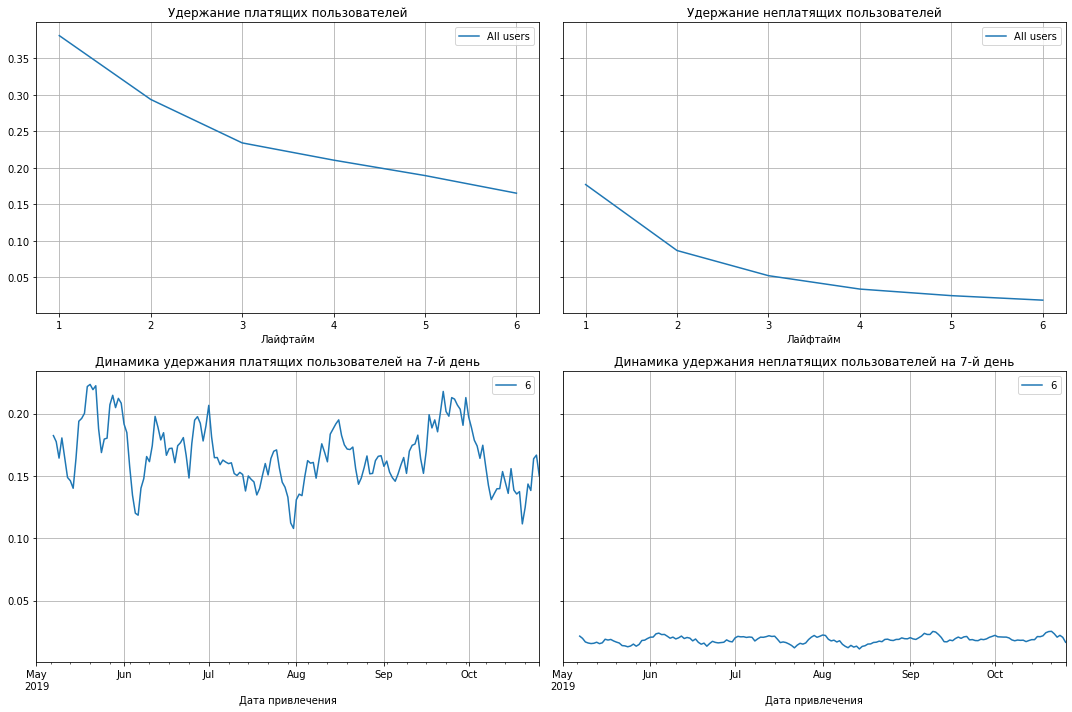

In [45]:
# смотрим удержание без доп разбивки

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

Кривая удержания платящих пользователей выше, чем неплатящих, обе кривые постепенно снижаются, значит, всё корректно. При этом динамика удержания +- стабильна, но в конце рассматриваемого периода у платящих пользователей она начинает снижаться.

Для более тщательного анализа необходимо рассмотреть конверсию и удержание с разбивками по:

- виду устройств;
- каналу привлечения;
- региону пользователя.

##### Конверсия и удержание пользователей с разбивкой по типу устройства:

In [46]:
# задаём дополнительную разбивку по устройствам

dimensions = ['device']

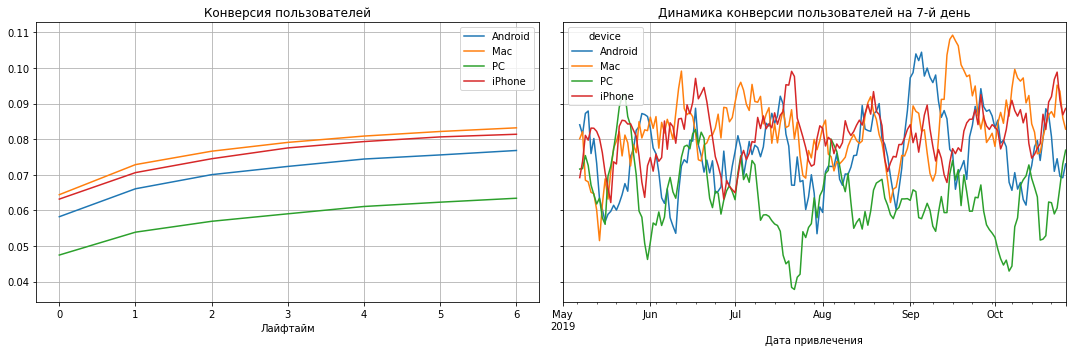

In [47]:
# считаем конверсию и строим графики

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи с *PC* конвертируются заметно хуже остальных.

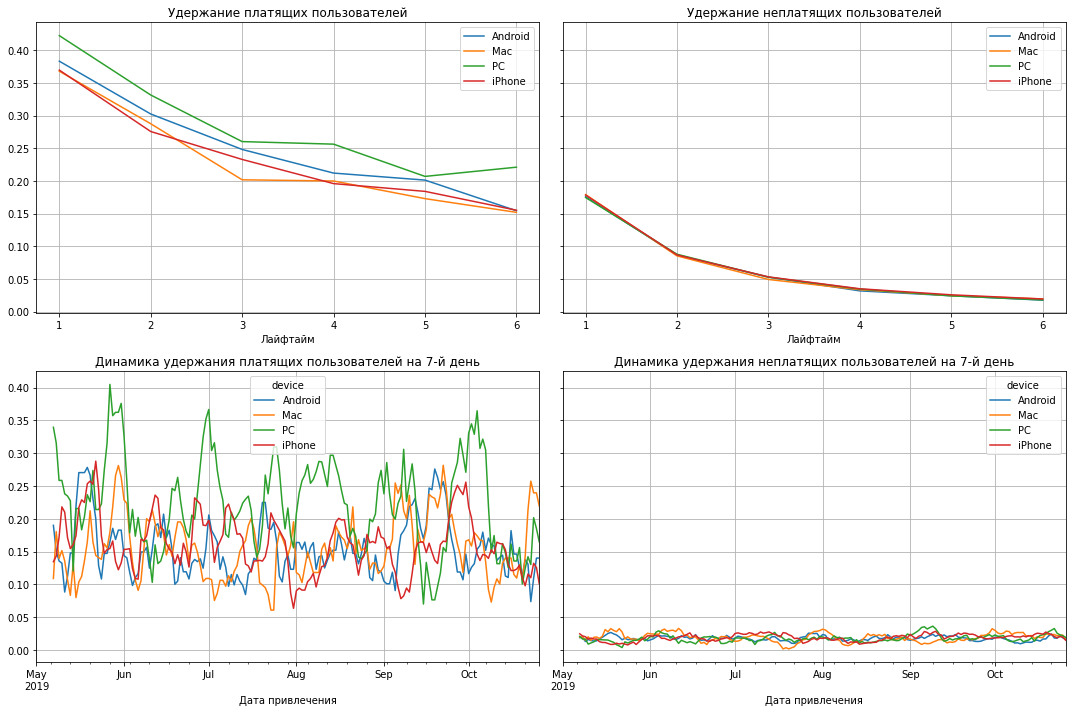

In [48]:
# считаем удержание с доп разбивкой и строим графики

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Обрати внимание, что удержание неплатящих пользователей из разных каналов, стран, платформ ровное, а удержание платящих очень отличается, как считаешь почему так?
</div>

Проблем с удержанием пользователей, использующих конкретный вид устройств, не наблюдается. Видно, что несмотря на самую низкую конверсию у пользователей с устройством *PC* удержание выше.

##### Конверсия и удержание пользователей с разбивкой по стране:

Рассмотрим конверсию и удержание пользователей из разных стран:

In [49]:
# задаём дополнительную разбивку по стране

dimensions = ['region']

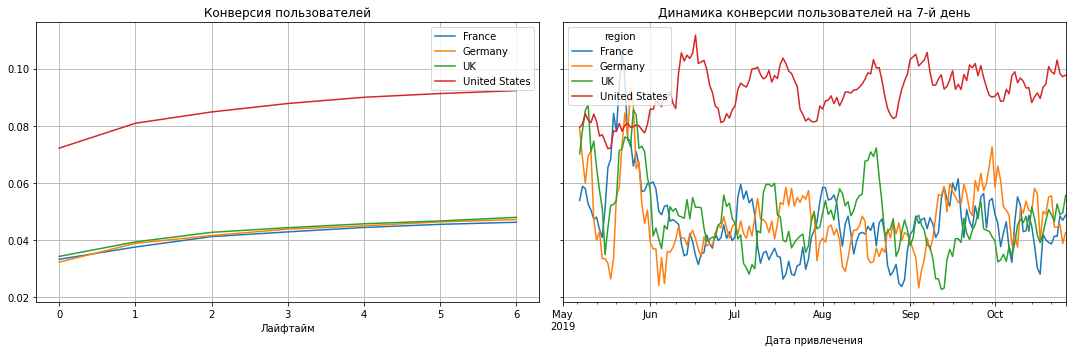

In [50]:
# считаем конверсию и строим графики

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей из США значительно выше, чем у пользователей из других стран, посмотрим на удержание:

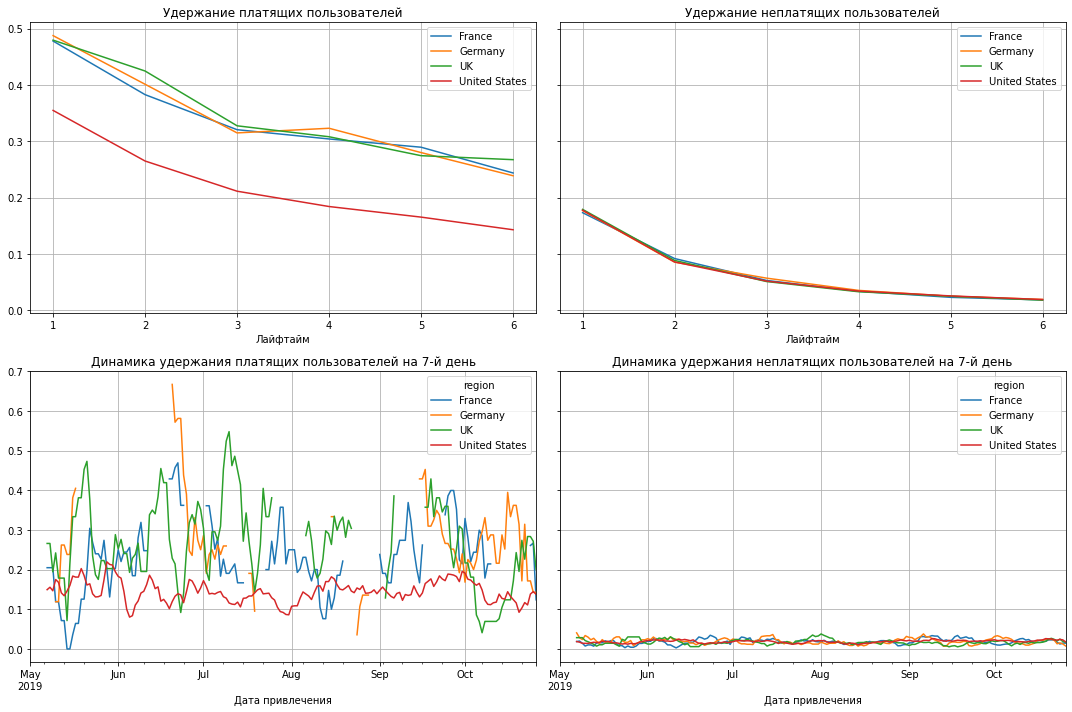

In [51]:
# считаем удержание с доп разбивкой и строим графики

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Существенная проблема - плохое удержание в US, можно было подробнее посмотреть на всех ли каналах, которые приводят трафик в US, такая ситуация, анонсирую, что два самых крупных канала приводят трафик только из US, если захочешь, можешь поисследовать. Любопытно, что динамика конверсии `US` становится с течением времени не такой волатильной. </div>

На удивление удержание платящих пользователей из США стабильно ниже остальных. Похоже пользователи из этой страны часто совершают первую покупку, но повторно возвращаются реже пользователей из других стран.

Видно, как прерывиста динамика удержания платящих пользователей по всем странам, кроме США - это говорит о том, что пользователи из США привлекаются на регулярной основе, их количество значительно превышает количество пользователей из других стран.

##### Конверсия и удержание пользователей с разбивкой по каналу привлечения:

Рассмотрим конверсию и удержание пользователей, привлеченных из разных источников:

In [52]:
# задаём дополнительную разбивку по каналу привлечения

dimensions = ['channel']

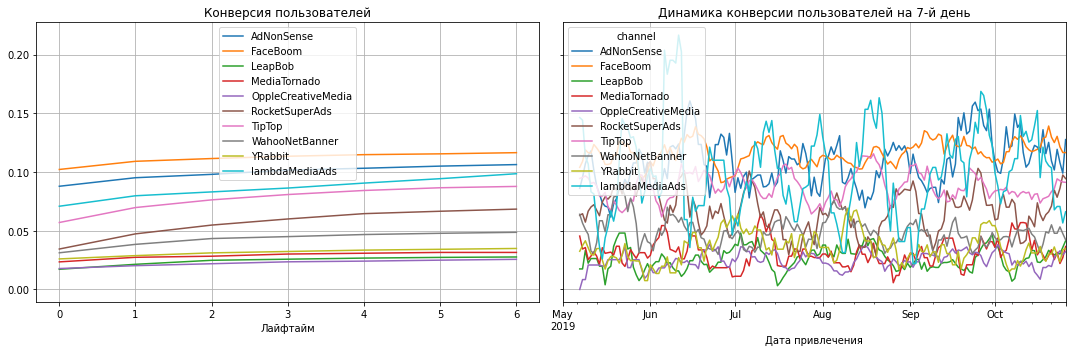

In [53]:
# считаем конверсию и строим графики

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей, привлеченных из *FaceBoom* является самой высокой, ниже всех конверсия у OppleCreativeMedia. При этом видно, что конверсия очень слабо растёт после второго лайфтайма.

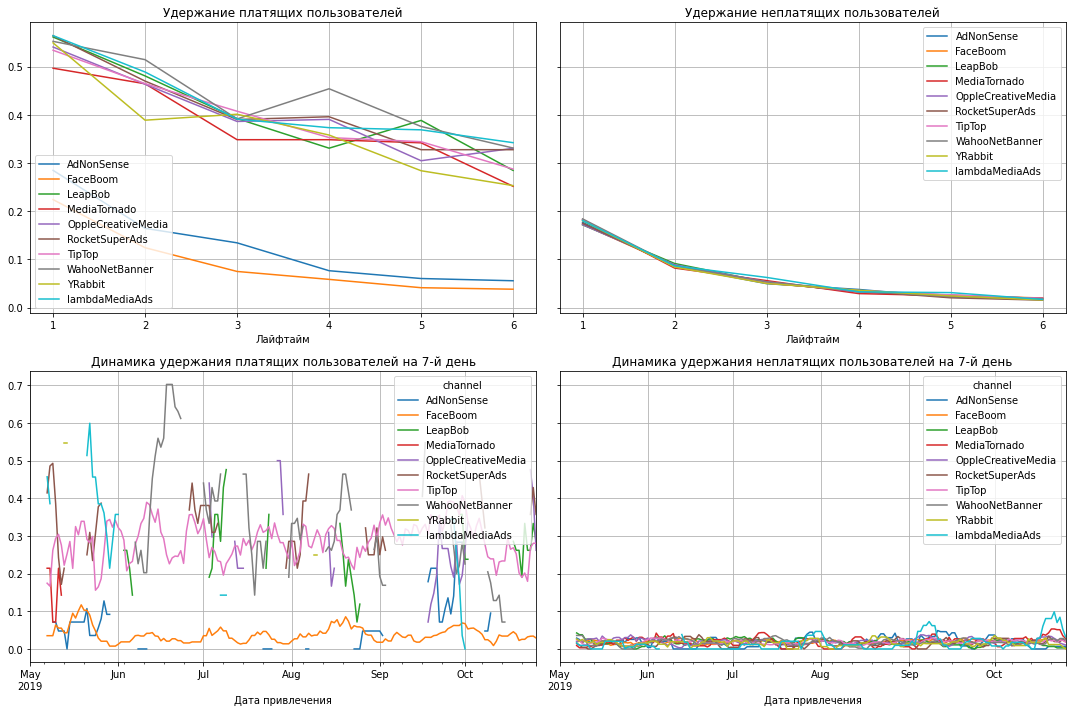

In [54]:
# считаем удержание с доп разбивкой и строим графики

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

В удержании пользователей мы снова видим проблему. Несмотря на высокую конверсию, платящие пользователи каналов *FaceBoom* и *AdNonSense* стабильно плохо удерживаются. Возможно на этих каналах предлагается какой-то дополнительный бонус от канала привлечения за первую покупку, ради которой пользователи совершают её и больше не возращаются.

Также может быть проблема технического характера, возможно возникают ошибки в платежах при попытке совершить их через данные рекламные каналы. Для более полной информации необходимы данные о событиях.

Динамика удержания по некоторым каналам довольно прерывиста, это говорит о том, что по ним приходит мало новых пользователей, не каждый день/неделю/месяц.

#### Анализ окупаемости рекламы с разбивкой по устройствам

In [55]:
# задаём дополнительную разбивку по устройствам

dimensions = ['device']

Считаем показатели LTV, CAC, ROI и строим графики:

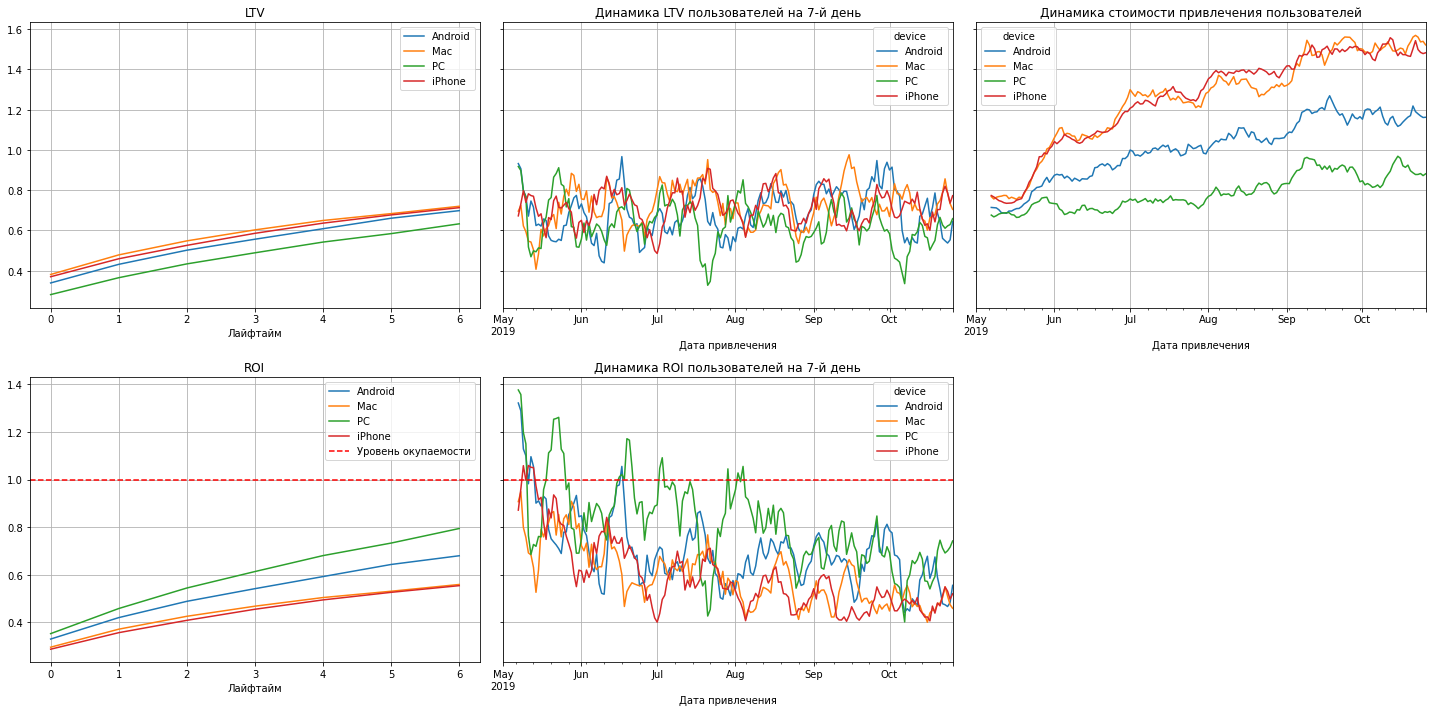

In [56]:
# считаем LTV и ROI с разбивкой по устройствам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
   profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Хочу акцентировать твоё внимание на способе решения в данном случае комплексной задачи - неокупаемость маркетинга. Мы эту составную проблему раскладываем на частные причины, декомпозируем весь трафик по странам, устройствам, регионам и ищем где конкретно и в какой момент случилась проблема. Опять же рекомендую здесь тоже использовать маркированный список) 
</div>

LTV клиентов стабилен. Те клиенты, кто пользуется *iPhone* и *Mac*, являются самыми дорогими по стоимости привлечения. При этом среди остальных пользователей, клиенты, пользующиеся всеми видами устройств, кроме *PC* не окупаются по прошествии 14-и дней после привлечения.

Это говорит о том, что с увеличением расходов на рекламу снижается окупаемость клиентов, то есть привлечения платящих пользователей недостаточно. При этом, скорее всего, каналы, на которые были потрачены бОльшие суммы маркетингового бюджета, привлекали больше пользователей, использующих *iPhone* и *Mac* и меньше - пользователей *PC*, так как их стоимость привлечения не является настолько высокой и такие клиенты окупаются.

#### Анализ окупаемости рекламы с разбивкой по странам

In [57]:
# задаём дополнительную разбивку по устройствам

dimensions = ['region']

Считаем показатели LTV, CAC, ROI и строим графики:

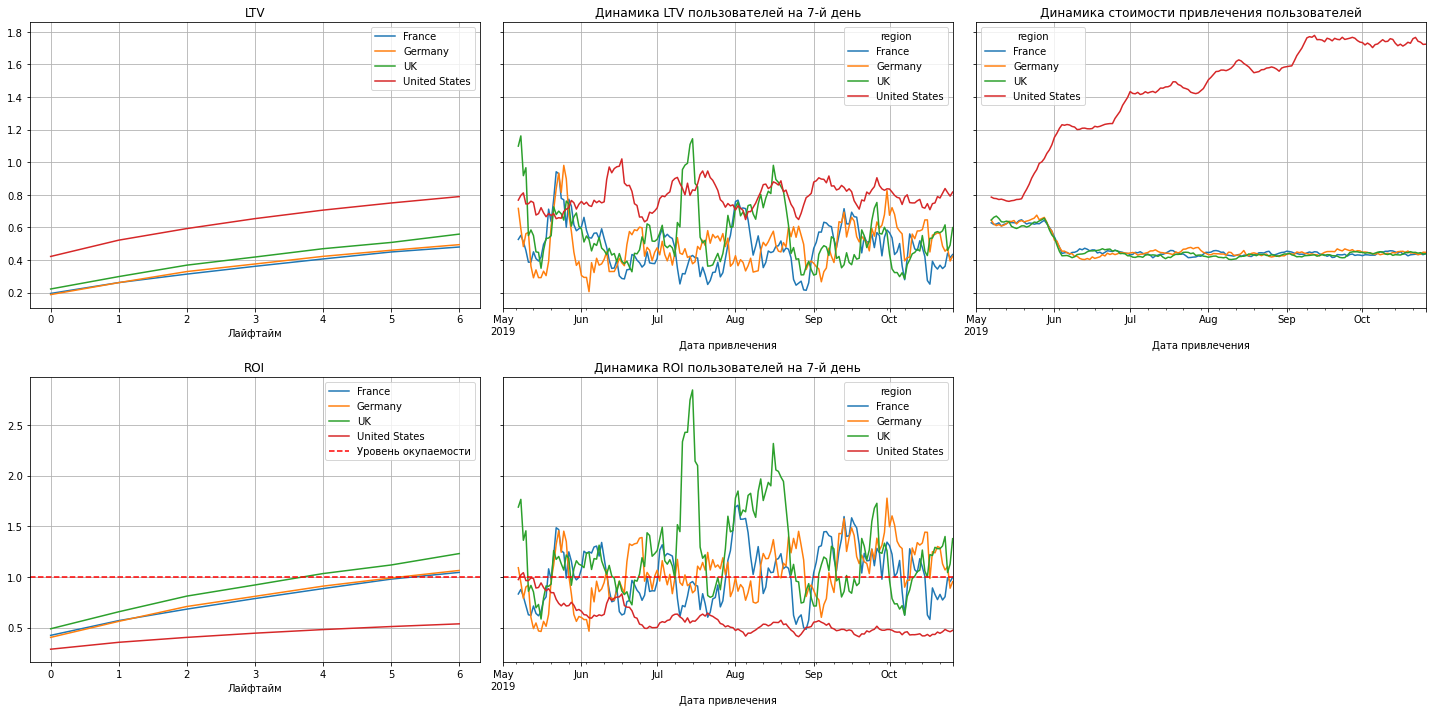

In [58]:
# считаем LTV и ROI с разбивкой по странам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Крайне полезная находка, действительно все каналы, кроме органики имеют региональную специфику, спасибо, что выявила эту взаимосвязь 

Видим, что пользователи США стабильно не окупаются, среди всех остальных стран. При этом стоимость привлечения клиентов оттуда очень выросла. Значит, увеличенный рекламный бюджет был направлен на те каналы привлечения, с которых приходили именно пользователи США. Проверим:

In [59]:
# количество привлеченных пользователей разных стран по каналу TipTop

profiles_filtered.query('channel=="TipTop"').groupby('region')['user_id'].nunique()

region
United States    19561
Name: user_id, dtype: int64

In [60]:
# количество привлеченных пользователей разных стран по каналу FaceBoom

profiles_filtered.query('channel=="FaceBoom"').groupby('region')['user_id'].nunique()

region
United States    29144
Name: user_id, dtype: int64

Гипотеза подтвердилась. Маркетологи потратили значительных рекламный бюджет на каналы привлечения пользователей из США.

#### Анализ окупаемости рекламы с разбивкой по каналам привлечения

In [61]:
# задаём дополнительную разбивку по каналам привлечения

dimensions = ['channel']

Считаем показатели LTV, CAC, ROI и строим графики:

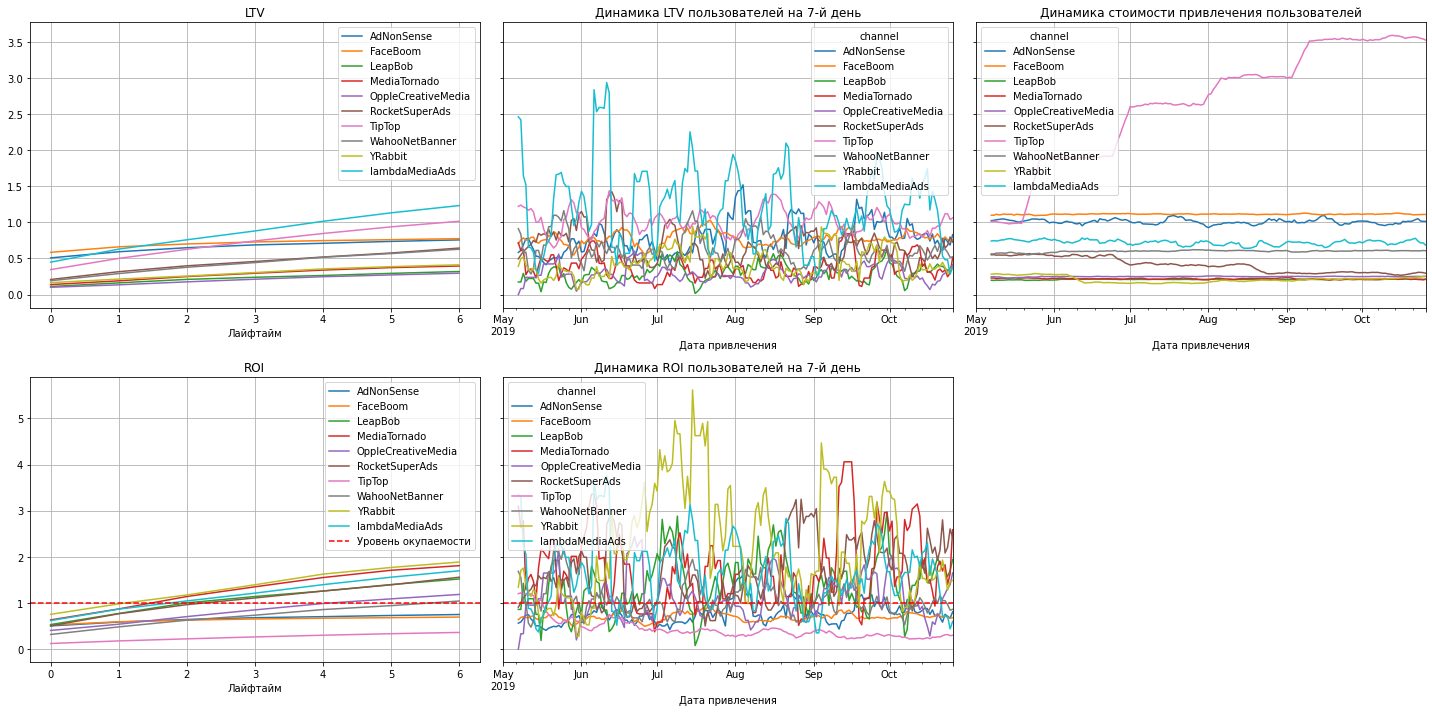

In [62]:
# считаем LTV и ROI с разбивкой по странам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Пользователи, привлеченные с каналов *AdNonSense*, *TipTop* и *FaceBoom* не окупаются. При этом, если на канал *AdNonSense* рекламные расходы особо не менялись, а даже снизились, то на каналы *FaceBoom* и *TipTop* было привлечено значительное количество рекламных средств, то есть отдел маркетинга рассчитывал, что увеличение рекламного бюджета на данные источники будет оптимальным с точки зрения привлечения новых клиентов и увеличения прибыли, однако этого не произошло.

Заметим, что стоимость привлечения пользователей через канал *FaceBoom* при этом не изменилась, значит, увеличение бюджета на данный канал привело к увеличению привлечения платящих пользователей, однако этот канал и раньше себя не окупал - сильно дорогой трафик.

Стоимость привлечения пользователей через канал *TipTop* в динамике растёт, значит увеличение рекламного бюджета на канал не даёт линейного увеличения привлечения платящих пользователей. Маркетологи выбрали самые дорогостоящие по трафику каналы и они не оправдали себя.

Ниже построю графики изменения количества привлеченных клиентов, как всех, так и только платящих за рассматриваемый период:

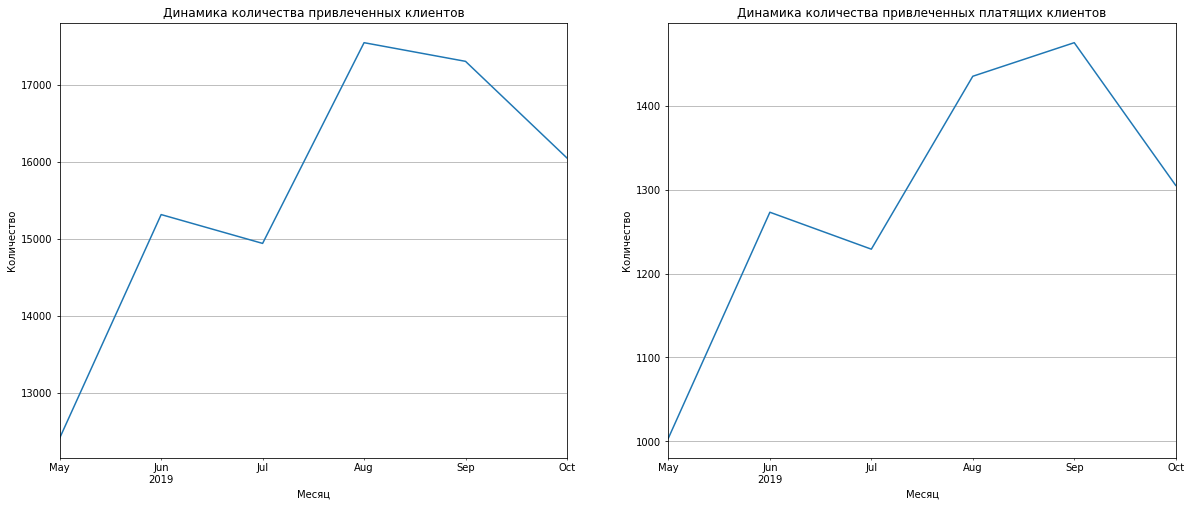

In [63]:
# количество привлеченных клиентов

plt.figure(figsize=[20, 8])
(
    profiles_filtered.groupby('month')['user_id']
    .nunique()
    .plot(title='Динамика количества привлеченных клиентов', 
          ax=plt.subplot(1, 2, 1), grid=True)
)
plt.xlabel('Месяц')
plt.ylabel('Количество')

(
    profiles_filtered.query('payer==True').groupby('month')['user_id']
    .nunique()
    .plot(title='Динамика количества привлеченных платящих клиентов', 
          ax=plt.subplot(1, 2, 2),grid=True)
)
plt.xlabel('Месяц')
plt.ylabel('Количество')


plt.show()

Получается, что после увеличения бюджета рекламных средств общее привлечение пользователей и привлечение платящих пользователей увеличилось, однако этого было недостаточно для того, чтобы окупился рекламный бюджет.

In [64]:
# количество привлеченных платящих клиентов по каналам привлечения и регионам

profiles_filtered.query('payer==True').pivot_table(index=['channel', 'region'], values='user_id', aggfunc='nunique')

user_id
channel            region                
AdNonSense         France             150
                   Germany            142
                   UK                 148
FaceBoom           United States     3557
LeapBob            France              90
                   Germany             69
                   UK                 103
MediaTornado       United States      156
OppleCreativeMedia France              80
                   Germany             64
                   UK                  89
RocketSuperAds     United States      352
TipTop             United States     1878
WahooNetBanner     France             152
                   Germany            148
                   UK                 153
YRabbit            United States      165
lambdaMediaAds     France              82
                   Germany             67
                   UK                  76

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Отличная вся разбивка, теперь понятно, что `FaceBoom` и `TipTop` подпортили показатели окупаемости в `US`</div>

## Общий вывод

В ходе проведенного исследования для развлекательного приложения *Procrastinate Pro+* проанализированы данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, их покупках и расходах компании на рекламу в этот период.
Исследование проводилось в несколько этапов:

- выполнена предобработка данных: установлен корректный тип данных и стиль оформления, проведена проверка на пропуски и дубликаты;
- для подготовки к исследованию были заданы функции для расчёта LTV, CAC, ROI, удержания и конверсии, также заданы функции для построения графиков по данным метрикам;
- проведен исследовательский анализ данных: построены профили пользователей, представлено общее количество пользователей и доля платящих клиентов по нескольким разбивкам (страны, устройства, рекламные каналы);
- проанализированы маркетинг компании, распределение маркетинговых расходов;
- оценена окупаемость рекламы приложения.

**После проведенного исследования можно сделать следующие выводы:**

1. Общая сумма расходов на маркетинг за рассматриваемый период составила около 105 тысяч. Всего компания использует 11 каналов привлечения клиентов. Более половины всех расходов пришлось на канал *TipTop* - "лидер" по затратам, на втором месте *FaceBoom*, на который приходится примерно треть от всех расходов.


2. Выявлено, пользователи не окупаются через две недели после привлечени, ROI — около 80%, CAC значительно возрастает, что говорит об увеличении рекламного бюджета с июня 2019, а LTV достаточно стабилен.


3. С помощью анализа метрик в различных разбивках выявлены причины неэффективности привлечения пользователей:


- *конверсия пользователей из США значительно выше, чем у пользователей из других стран, однако удержание платящих пользователей из данной страны стабильно ниже остальных, то есть платящие пользователи из США повторно возвращаются реже других. Вероятнее всего, отдел маркетинга решил, что раз доля платящих пользователей выше в США, и пользователей оттуда приходит в приложение больше, то необходимо направить рекламу на привлечение именно таковых клиентов. Однако они не учли показатель их удержания. Возможно у пользователей каналов FaceBoom и AdNonSense (с низким удержанием) возникает проблема технического характера, например, ошибки платежа. Это больше влияет на повышение стоимости привлечения и неоккупаемость американских клиентов, так как именно на них был распределен основной рекламный бюджет. Для более полной информации необходимы данные о событиях.*


**Итого: отдел маркетинга решил вложиться в те каналы привлечения, которые привлекают больше всего пользователей из США (что логично, ведь у данных пользователей высокий показатель конверсии и доля платящих): *TipTop* и *FaceBoom*. Однако канал *TipTop* имеет самый дорогой трафик среди всех других и поэтому не окупается. А канал *FaceBoom* вероятно ведёт к технической проблеме с оплатой. Стоило обратить внимание, что данные каналы и с меньшим вложением в них не окупали себя.**


**Рекомендации отделу маркетинга:** 

1. Необходимо проработать проблему низкого удержания у пользователей США - посмотреть с чем возникает проблема при попытке оплаты у пользователей каналов *FaceBoom* и *AdNonSense*. А также отказаться от привлечения в дорогостоящих и не окупаемых каналах - *TipTop*. Помимо этого, можно вложиться в канал *RocketSuperAds* - следующий по количеству привлеченных платящих пользователей окупаемый канал, с неплохой конверсией и удержанием, но важно следить за динамикой.


2. Также стоит обратить внимание на привлечение пользователей из других стран, которые стабильно окупаются, увеличение их трафика также поможет росту прибыли компании. В таком случае рекомендуется обратить внимание на канал *lambdaMediaAds* с хорошей конверсией, удержанием, LTV и окупаемостью.

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
* Отличная работа, все критические замечания исправлены, принимаю проект, ты молодец). Спасибо за связь каналов и стран, теперь удалось создать комплексную картину проблем маркетинга. Ну и я считаю важной рекомендацией - чаще обращать внимания на показатели маркетинга, а то очень похоже, что маркетинговый отдел долгое время сжигал деньги не очень эффективно). В работе я оставил некоторое количество мелких рекомендаций от себя, надеюсь ты из них вынесешь что-то для себя и будешь активно применять в будущих проектах и работе.) 
    
* В части по анализу графиков я оставил несколько вопросов, но так как проект я принимаю не хочу оставлять тебя без ответов. В более ровном удержании виновато число пользователей. Когда говорим об удержании платящих, видим величину волатильную, но это не из-за её природы, а из-за того, что наблюдений мало, и каждое отдельное наблюдение существенно влияет на оценку, такая особенность часто может проявляться в анализе, так что рекомендую проверять число наблюдений, чтобы не ошибаться с выводами.
   
* Сейчас работаю аналитиком в отделе закупки игровой компании и US это действительно наибольший рынок, ему достается процентов 30-40 всего трафика, да набор каналов существенно шире, но US доминирует в этом плане. Конечно у нас перед глазами набор дашбордов, которые позволяют контролировать множество всяких метрик, но периодически бывает всякое, конечно же масштабирование канала, который становится всё хуже и хуже - сомнительная идея, а оптимизации происходят существенно чаще, по некоторым каналам раз в неделю, а по некоторым и ещё чаще). Благодарю за совместную работу, желаю удачи!) 
    
</div>